In [5]:
import pandas as pd
import matplotlib as plt
#import seaborn as sns
import numpy as np
import pickle

Загрузка и знакомство с данными

In [9]:
# https://www.kaggle.com/datasets/krishujeniya/heart-diseae

df = pd.read_csv('D:/Xranenie/1. УЧЕБА/М/m 2.1/Мохов/lr1/lab_IIS/heart-disease.csv')

In [10]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')

In [14]:
df['age'] = df['age'].astype('int8')
df['trestbps'] = df['trestbps'].astype('int16')
df['chol'] = df['chol'].astype('int16')
df['thalach'] = df['thalach'].astype('int16')

In [15]:
df['oldpeak'] = df['oldpeak'].astype('float16')

In [16]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.040039
std,9.082101,17.538143,51.830751,22.905161,1.161133
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.799805
75%,61.000000,140.000000,274.500000,166.000000,1.599609
max,77.000000,200.000000,564.000000,202.000000,6.199219


In [17]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int8    
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int16   
 4   chol      303 non-null    int16   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int16   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float16 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float16(1), int16(3), int8(1)
memory usage: 6.8 KB


In [18]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [20]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

sex - numer of unique = 2
cp - numer of unique = 4
fbs - numer of unique = 2
restecg - numer of unique = 3
exang - numer of unique = 2
slope - numer of unique = 3
ca - numer of unique = 5
thal - numer of unique = 4
target - numer of unique = 2


In [21]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in sex: sex
1    207
0     96
Name: count, dtype: int64
Unique categories in cp: cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
Unique categories in fbs: fbs
0    258
1     45
Name: count, dtype: int64
Unique categories in restecg: restecg
1    152
0    147
2      4
Name: count, dtype: int64
Unique categories in exang: exang
0    204
1     99
Name: count, dtype: int64
Unique categories in slope: slope
2    142
1    140
0     21
Name: count, dtype: int64
Unique categories in ca: ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
Unique categories in thal: thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
Unique categories in target: target
1    165
0    138
Name: count, dtype: int64


# Очистка данных
очистка даннных проводится не будет

# Анализ признаков для модели

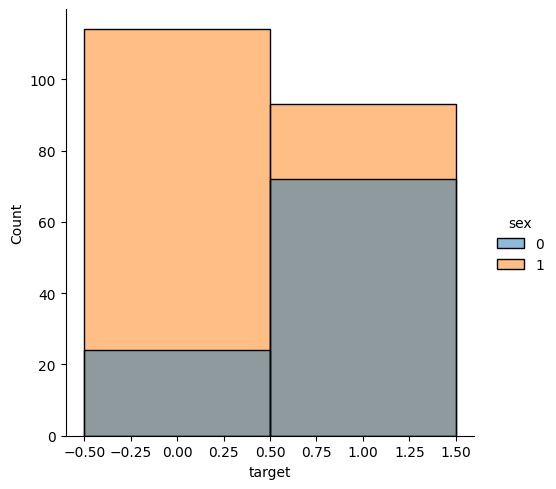

In [30]:
sns.displot(df, x='target', bins=100, hue='sex', log_scale=True)

0 - женщины, 1 - мужчины. Вывод: у мужчин сердечные заболевания встречаются чаще, чем у женщин

<Axes: >

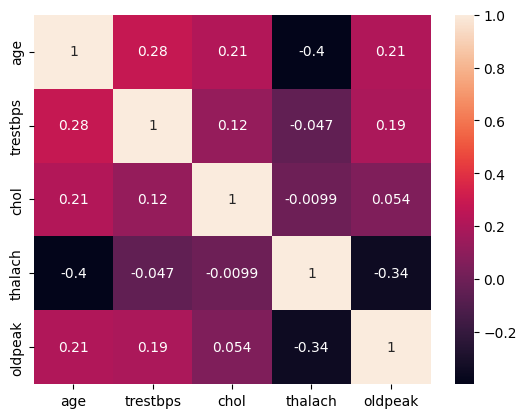

In [31]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

Вывод: корреляция признаков слабая. Только у максимальной частотой сердечных сокращений (thalach) с возрастом (age) и депрессией ST (oldpeak) наблюдается некоторая корреляция.  

In [ ]:
import plotly.express as px 
fig=px.box(df,x='cp',y='age',color='cp',title='Тип боли/возраст')
fig.update_layout(
     title={
         'y':0.9,
         'x':0.5,
         'xanchor':'center',
         'yanchor':'top'
     }
)
fig.show()

In [22]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
from bokeh.io.export import get_screenshot_as_png

output_notebook()

Loading BokehJS ...

In [31]:
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='chol', y='age')
hover = HoverTool(tooltips=[('Возраст', '@age'),
                              ('Холестерин', '@chol'),
                              ('Стенокардия', '@exang'),
                              ('Сердечное заболевание', '@target')])

p.add_tools(hover)
show(p)

# Сохранение финального датасета

In [35]:
df.to_pickle('D:/Xranenie/1. УЧЕБА/М/m 2.1/Мохов/lr1/lab_IIS/clean_data.pkl')

In [36]:
df = pd.read_pickle('D:/Xranenie/1. УЧЕБА/М/m 2.1/Мохов/lr1/lab_IIS/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int8    
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int16   
 4   chol      303 non-null    int16   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int16   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float16 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float16(1), int16(3), int8(1)
memory usage: 5.7 KB
